**Import Data**

In [1]:
# import appropriate packages
import numpy as np
import pandas as pd

In [2]:
# read the excel file
# had to install the xlrd package to read the file 
cols = ['I1', 'I2', 'I3', 'pIPO', 'pH', 'pL', 'p1day', 'C1', 'C2', 'C3', 'C4', 
        'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']
df = pd.read_excel("../Competition1_raw_data.xlsx", names=cols)
df.head(10)

,I1,I2,I3,pIPO,pH,pL,p1day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.2,94,1,0.06,...,7407407,197.591,510,17999,13934,328,815,62,96,181
6,ACOR,ACORDA THERAPEUTICS INC,2836,6,13,11,6.72,128,1,-1.87,...,5500000,5.146,495,15758,13953,379,698,82,106,135
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122
8,ACTV,ACTIVE NETWORK INC,7372,15,18,16,15.9,100,1,-0.51,...,11000000,279.6,620,14813,13463,335,917,58,124,234
9,ACW,ACCURIDE CORP,3714,9,19,17,0,106,1,1.49,...,11000000,494.008,385,9134,8107,198,459,81,90,147


In [3]:
# did not include column C2 as it is a binary varible and does not need imputation
# must remember to add column back in to dataframe at the end of notebook 
dfx = df.filter(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3'])
dfx.head()

,C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,122,1,3.43,0.0290743,40962052,10600000,51.345,470,12719,11560,301,690,62,117,139
1,259,0,-1.62,-0.0133516,28869196,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,90,1,-1.24,0.020715,16845668,5000000,7.378,201,5262,4785,128,325,61,33,60
3,209,1,-0.91,0.0200231,14848637,4500000,8.526,328,8259,7574,177,509,80,59,110
4,80,1,0.07,-0.0348947,30741716,8250000,632.298,572,14830,13176,336,720,67,149,167


In [4]:
# created a dataframe for the target (y) variables 
# these variables are not imputed
dfy = df.filter(['pIPO', 'pH', 'pL', 'p1day'])
dfy.head()

,pIPO,pH,pL,p1day
0,10,9.5,8.5,11.87
1,8,10,8,7.25
2,7,14,12,6.7
3,11.5,16,14,12.39
4,21,21,19,56.6


In [5]:
# created a dataframe just for the  ID variables 
dfid = df.filter(['I1', 'I2', 'I3'])
dfid.head()

,I1,I2,I3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834
2,ACAD,ACADIA PHARMACEUTICALS INC,2834
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492


In [6]:
# replaced missing ('-') values in dfy with NaN and changed datatype
dfy.replace(to_replace='-', value=np.nan, inplace=True)
dfy.head(10)

,pIPO,pH,pL,p1day
0,10.0,9.5,8.5,11.870000
1,8.0,10.0,8.0,7.250000
2,7.0,14.0,12.0,6.700000
3,11.5,16.0,14.0,12.390000
4,21.0,21.0,19.0,56.599998
5,13.5,14.5,12.5,14.200000
6,6.0,13.0,11.0,6.720000
7,5.0,14.0,12.0,4.550000
8,15.0,18.0,16.0,15.900000
9,9.0,19.0,17.0,0.000000


In [7]:
# verifying that '-' was replaced with NaN and the datatypes were changed to floats 
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 4 columns):
pIPO     677 non-null float64
pH       672 non-null float64
pL       672 non-null float64
p1day    660 non-null float64
dtypes: float64(4)
memory usage: 21.4 KB


**Examining the DataFrame dfx**

In [8]:
# exmaining the columns
# know that this is not entirely accurate because the missing values are represented by "-" not NaN
# we can see that all the dtypes are objects 
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 15 columns):
C1    682 non-null object
C2    682 non-null object
C3    682 non-null object
C4    682 non-null object
C5    682 non-null object
C6    682 non-null object
C7    682 non-null object
T1    682 non-null object
T2    682 non-null object
T3    682 non-null object
T4    682 non-null object
T5    682 non-null object
S1    682 non-null object
S2    682 non-null object
S3    682 non-null object
dtypes: object(15)
memory usage: 80.0+ KB


In [9]:
# loooking for missing values
print(dfx.isnull().sum(axis=0).tolist())

# again, we know this output is not entirely accurate 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
# replace '-' with NaN in dfx
dfx.replace(to_replace='-', value=np.nan, inplace=True)
dfx.head(10)

,C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,94.0,1.0,0.06,-0.057556,42402916.0,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,128.0,1.0,-1.87,0.004106,19047022.0,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,91.0,0.0,-0.74,0.040620,19371750.0,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,100.0,1.0,-0.51,-0.029316,52982501.0,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,106.0,1.0,1.49,-0.024925,33622690.0,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [11]:
# get df info again 
# see that we have more accurate counts of non null entries and data types have been changed to float64 for approproate columns
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 15 columns):
C1    660 non-null float64
C2    660 non-null float64
C3    646 non-null float64
C4    660 non-null float64
C5    676 non-null float64
C6    676 non-null float64
C7    610 non-null float64
T1    681 non-null float64
T2    681 non-null float64
T3    681 non-null float64
T4    681 non-null float64
T5    681 non-null float64
S1    681 non-null float64
S2    681 non-null float64
S3    681 non-null float64
dtypes: float64(15)
memory usage: 80.0 KB


In [12]:
# count of number of missing records in each column
val = []
for col in dfx.columns:
    val.append(dfx[dfx.columns].isnull().sum())
    break
print(val)

# now we know how many values are missing in each column

[C1    22
C2    22
C3    36
C4    22
C5     6
C6     6
C7    72
T1     1
T2     1
T3     1
T4     1
T5     1
S1     1
S2     1
S3     1
dtype: int64]


**Descriptive Stats - Before Imputation**

In [13]:
## descriptive stats on the df before imputation 
dfx.describe()

,C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [14]:
# median of each column
dfx.median()

C1    1.070000e+02
C2    1.000000e+00
C3    1.000000e-02
C4    9.124591e-03
C5    2.740018e+07
C6    7.398704e+06
C7    1.038330e+02
T1    4.440000e+02
T2    1.204500e+04
T3    1.078500e+04
T4    2.790000e+02
T5    6.240000e+02
S1    6.000000e+01
S2    1.000000e+02
S3    1.340000e+02
dtype: float64

**Visual EDA of variables before Imputation**

In [15]:
# Show distribution of all variables to identify if normalization & standardization is needed 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

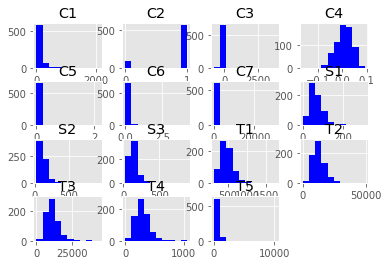

In [16]:
# may help to identify which variables need to be normalized 
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


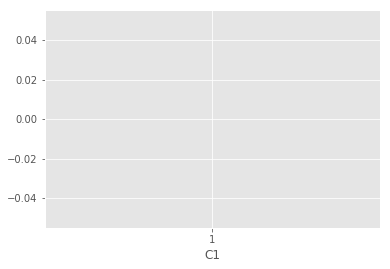

In [17]:
plt.boxplot(dfx['C1'])
plt.xlabel('C1')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


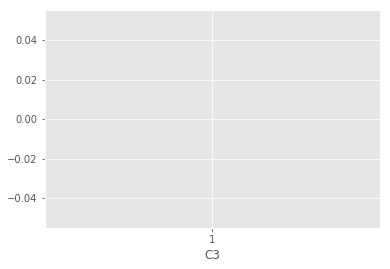

In [18]:
plt.boxplot(dfx['C3'])
plt.xlabel('C3')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


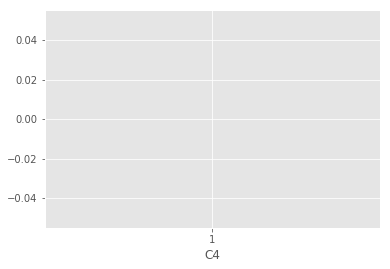

In [19]:
plt.boxplot(dfx['C4'])
plt.xlabel('C4')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


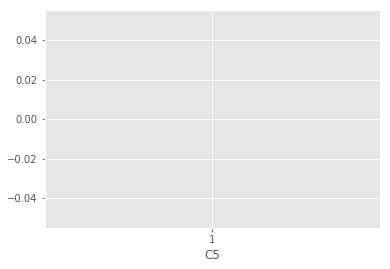

In [20]:
plt.boxplot(dfx['C5'])
plt.xlabel('C5')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


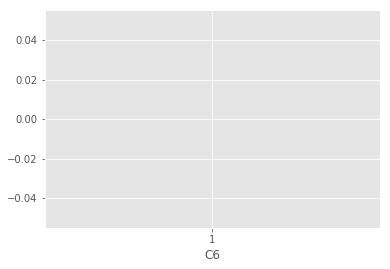

In [21]:
plt.boxplot(dfx['C6'])
plt.xlabel('C6')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/opt/tljh/user/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


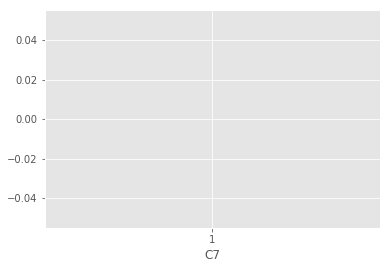

In [22]:
plt.boxplot(dfx['C7'])
plt.xlabel('C7')
plt.show()

**Imputation**

In [23]:
# before imputation we must remove column C2 because it is binary so it does not need to be imputed 
# will concat this df with dfx later in notebook 
dfbinary = dfx.filter(['C2'])
dfbinary.head()

,C2
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [24]:
# drop C2 so it does not get imputed (introduces error we don't need)
dfx = dfx.drop(labels='C2', axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


In [25]:
# replace null value with mean because we have continuous variables 
for value in dfx.columns:
    dfx.fillna(dfx.mean(), inplace=True)
print(dfx.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [26]:
# just checking that the NaN values were replaced with the mean of the column
dfx.head(10)

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345000,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936000,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378000,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526000,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298000,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,94.0,0.06,-0.057556,42402916.0,7407407.0,197.591000,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,128.0,-1.87,0.004106,19047022.0,5500000.0,5.146000,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,91.0,-0.74,0.040620,19371750.0,8000000.0,500.459962,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,100.0,-0.51,-0.029316,52982501.0,11000000.0,279.600000,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,106.0,1.49,-0.024925,33622690.0,11000000.0,494.008000,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


**Decriptive Stats - After Imputation**

In [27]:
dfx.describe()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,149.728788,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,150.328785,158.308600,0.032775,1.039156e+08,2.501761e+07,1558.767222,175.612567,5445.641920,4836.115518,121.443374,472.566975,39.067810,84.766654,69.225403
min,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,85.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9195.750000,8168.000000,213.250000,462.250000,45.000000,73.000000,100.000000
50%,110.000000,0.070000,0.007282,2.759165e+07,7.500000e+06,134.738000,444.500000,12047.000000,10789.000000,279.500000,624.500000,60.000000,100.500000,134.000000
75%,152.750000,0.600000,0.030941,4.938184e+07,1.208721e+07,500.459962,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.750000,173.000000
max,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [28]:
dfx.median()

C1    1.100000e+02
C3    7.000000e-02
C4    7.282201e-03
C5    2.759165e+07
C6    7.500000e+06
C7    1.347380e+02
T1    4.445000e+02
T2    1.204700e+04
T3    1.078900e+04
T4    2.795000e+02
T5    6.245000e+02
S1    6.000000e+01
S2    1.005000e+02
S3    1.340000e+02
dtype: float64

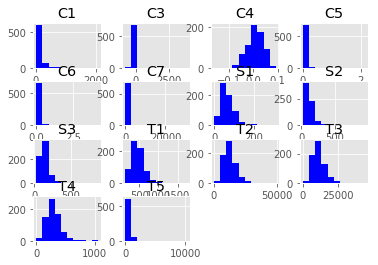

In [29]:
# showing histogram for x variables after imputation
# no significant change to distribution because we have not adjusted the skew of the data 
for col in dfx.columns:
    dfx.hist(color='blue')
    break
plt.show()

**Add New Columns**

In [30]:
# calculate P(mid)
dfy['Pmid'] = (dfy['pH'] + dfy['pL'])/2  
dfy.head()

,pIPO,pH,pL,p1day,Pmid
0,10.0,9.5,8.5,11.870000,9.0
1,8.0,10.0,8.0,7.250000,9.0
2,7.0,14.0,12.0,6.700000,13.0
3,11.5,16.0,14.0,12.390000,15.0
4,21.0,21.0,19.0,56.599998,20.0


In [31]:
# add new columns Y1, Y2, C3', C5', C6' using np.where
# tried doing this with a for loop - didn't work 
# columns also created in Alex's notebook for normalization  

dfy['Y1'] = np.where(dfy['pIPO']<dfy['Pmid'], 1,0)
dfy['Y2'] = np.where(dfy['pIPO']<dfy['p1day'], 1,0)
dfx['C3p'] = np.where(dfx['C3']<0, 1,0)
dfx['C5p'] = dfx['C5']/dfx['C6']
dfy['C6p'] = np.where(dfy['pIPO']>dfy['Pmid'], (((dfy['pIPO'] - dfy['Pmid']))/dfy['Pmid']) * 100,0)

# check that new columns were created
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C3p,C5p
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,3.864345
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,12.028832
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,3.369134
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,3.299697
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,3.726269


In [32]:
dfy.head()

,pIPO,pH,pL,p1day,Pmid,Y1,Y2,C6p
0,10.0,9.5,8.5,11.870000,9.0,0,1,11.111111
1,8.0,10.0,8.0,7.250000,9.0,1,0,0.000000
2,7.0,14.0,12.0,6.700000,13.0,1,0,0.000000
3,11.5,16.0,14.0,12.390000,15.0,1,1,0.000000
4,21.0,21.0,19.0,56.599998,20.0,0,1,5.000000


In [33]:
dfx = pd.concat([dfx, dfbinary], axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C3p,C5p,C2
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,3.864345,1.0
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,12.028832,0.0
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,3.369134,1.0
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,3.299697,1.0
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,3.726269,1.0


In [34]:
dfx.dtypes

C1     float64
C3     float64
C4     float64
C5     float64
C6     float64
C7     float64
T1     float64
T2     float64
T3     float64
T4     float64
T5     float64
S1     float64
S2     float64
S3     float64
C3p      int64
C5p    float64
C2     float64
dtype: object

In [35]:
for value in dfx.columns:
    dfx.fillna(dfx.mean(), inplace=True)
print(dfx.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [34]:
df.to_csv('csv_files/totaldf.csv')

In [35]:
dfx.to_csv('csv_files/x.csv')

In [36]:
dfy.to_csv('csv_files/y.csv')

In [37]:
dfid.to_csv('csv_files/id.csv')